D:\Temp\ipykernel_2496\2030869206.py:29: RuntimeWarning: divide by zero encountered in log
  RHvecsaft=np.asarray([np.exp(lngi(T,wi,**par)+np.log(wi)) for wi in wivec.T])[:,0]


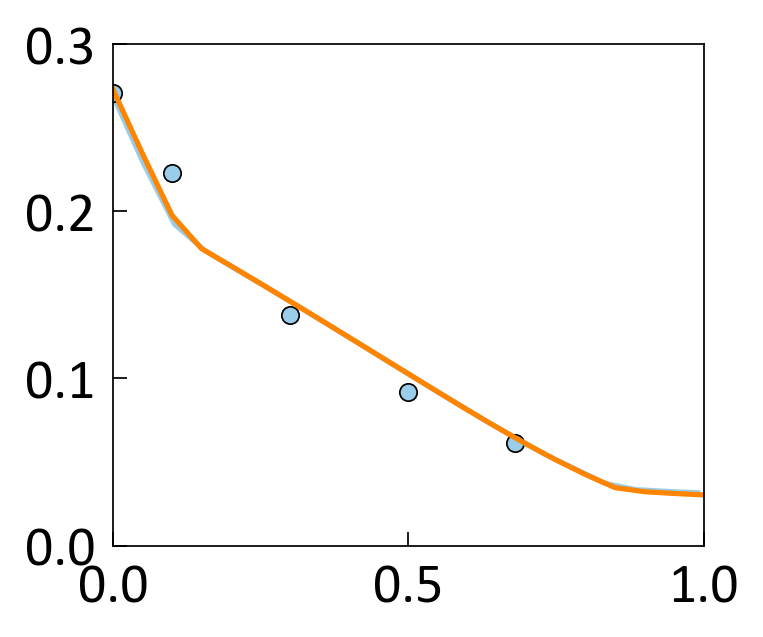

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from diffusionpy import vpure,NETVLE,lngi



par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": np.asarray([18.015,65000.,230.26]),
"kij":np.asarray([-0.128,0.00648,-0.0574]),
"kijA":np.asarray([0.,0.,0.])}

T=298.15
p=1E5
par['vpure']=vpure(p,T,**par)
netpar={'v0p': np.asarray([-1.,0.7478*1E-3,0]),
'ksw':np.asarray([0.244,0.,0.])}

def wASD(ww,dl): return np.asarray([ww,(1-ww)*(1-dl),(1-ww)*dl])

def isotherm(dl,RH):
    ww=np.linspace(0.00001,0.35,20)
    wivec=wASD(ww,dl)
    RHvecnet=np.asarray([NETVLE(T,wi,**netpar,**par) for wi in wivec.T])[:,0]
    RHvecsaft=np.asarray([np.exp(lngi(T,wi,**par)+np.log(wi)) for wi in wivec.T])[:,0]
    RHvec=RHvecnet.copy() 
    RHvec[RHvec>RHvecsaft]=RHvecsaft[RHvec>RHvecsaft]
    return np.interp(RH,RHvec,ww)

dlvec=np.linspace(0,0.99,20)
wws=np.asarray([isotherm(dl,0.9) for dl in dlvec])
wwLiso=np.asarray([0.27087,0.22302, 0.13792, 0.09208, 0.06118])
dliso=np.asarray([0,0.1 , 0.3 , 0.5 , 0.68])
plt.plot(dlvec,wws,'C1-')
plt.plot(dliso,wwLiso,'C1o')
plt.xlim(0,1)
plt.ylim(0,0.3)
plt.show()
